In [627]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [628]:
#Create a Model Class that inherites nn.Module
class Model(nn.Module):
    #Input layer (17 features)
    def __init__(self, in_features=17, h1=7, h2=4,  out_features=2):
        super().__init__()
        #fully connecting all neurons
        #2 hidden layers with 64 neurons per layer
        self.fc1 = nn.Linear(in_features, h1) 
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #if output is less than zero then output is zero
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [629]:
torch.manual_seed(10) #manual seed for randomization
model = Model()

In [630]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [631]:

my_df= pd.read_csv('cleaned_data.csv')


In [632]:
my_df

,Has_Diabetes,High_BP,Checked_Cho,Told_High_Cho,BMI,Smoker,Stroke,Heart_Attack,Physical_Health,Recent_Exercise,Avg_Drink,5_or_More_Drinks,Gen_Health,Mental_Health,Diff_Walking,Sex,Age,Income
0,False,True,True,True,2389.0,False,False,False,0.0,True,1.0,0.0,2.0,3.0,False,False,11.0,4.0
1,False,True,True,True,2500.0,True,False,False,0.0,True,2.0,0.0,3.0,0.0,True,False,11.0,4.0
2,True,False,True,False,2468.0,True,False,False,0.0,True,1.0,0.0,3.0,0.0,False,True,13.0,8.0
3,False,False,True,False,2569.0,True,False,False,15.0,False,1.0,0.0,3.0,0.0,False,False,7.0,7.0
4,True,True,True,True,2850.0,False,False,False,0.0,False,1.0,0.0,4.0,0.0,True,False,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140618,False,True,True,True,2780.0,True,False,False,0.0,False,2.0,0.0,3.0,0.0,False,False,11.0,7.0
140619,False,False,True,True,2728.0,False,False,False,3.0,False,4.0,8.0,1.0,0.0,False,True,6.0,4.0
140620,False,False,True,True,3054.0,True,False,False,0.0,False,2.0,1.0,4.0,0.0,True,True,6.0,1.0
140621,False,True,True,False,4229.0,False,False,False,4.0,True,2.0,0.0,3.0,14.0,False,True,3.0,8.0


In [633]:


import pandas as pd

# Read the CSV file into a DataFrame (assuming you haven't done this already)
df = pd.read_csv('cleaned_data.csv')

# Select rows where Has_Diabetes is True
df_filtered_true = df[df['Has_Diabetes'] == True]

# Get the number of True rows
num_true = len(df_filtered_true)

# Define the desired number of False rows
desired_false_count = 13000

# If there are more True rows than desired False rows
if num_true > desired_false_count:
    # Undersample True rows to match desired False count
    df_filtered_true = df_filtered_true.sample(desired_false_count, random_state=42)

# Select limited False rows (up to desired_false_count)
df_filtered_false = df[df['Has_Diabetes'] == False].iloc[:desired_false_count]

# Combine the DataFrames with True as the first set for clarity (optional)
df_filtered = pd.concat([df_filtered_true, df_filtered_false], ignore_index=True)

# Update the original DataFrame
df = df_filtered.copy()  # Create a copy to avoid setting issues

# Print the shape of the new DataFrame to verify
print(df.shape)
my_df=df
my_df




(26000, 18)


,Has_Diabetes,High_BP,Checked_Cho,Told_High_Cho,BMI,Smoker,Stroke,Heart_Attack,Physical_Health,Recent_Exercise,Avg_Drink,5_or_More_Drinks,Gen_Health,Mental_Health,Diff_Walking,Sex,Age,Income
0,True,True,True,True,3497.0,True,False,False,30.0,True,1.0,0.0,5.0,30.0,True,True,9.0,7.0
1,True,True,True,True,3315.0,True,False,False,0.0,True,2.0,0.0,3.0,0.0,False,True,12.0,6.0
2,True,True,True,True,2500.0,True,False,False,4.0,True,1.0,0.0,3.0,1.0,False,False,6.0,8.0
3,True,True,True,True,2071.0,True,False,False,30.0,False,3.0,0.0,5.0,30.0,True,True,10.0,4.0
4,True,True,True,False,2085.0,False,False,False,0.0,True,1.0,0.0,2.0,0.0,False,False,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,False,False,True,False,2806.0,True,False,False,15.0,True,8.0,3.0,1.0,3.0,False,True,1.0,6.0
25996,False,False,True,False,2103.0,False,False,False,10.0,True,1.0,0.0,1.0,14.0,False,False,5.0,8.0
25997,False,False,True,False,4045.0,False,False,False,2.0,True,3.0,0.0,2.0,30.0,False,True,5.0,8.0
25998,False,False,True,False,2413.0,True,False,False,2.0,True,3.0,3.0,2.0,7.0,False,False,1.0,4.0


In [648]:
my_df['Has_Diabetes'].value_counts()[False]

13000

In [649]:
my_df['Has_Diabetes'].value_counts()[True]

13000

In [634]:
# Convert boolean columns to integers (True -> 1, False -> 0)
bool_columns = ['High_BP', 'Checked_Cho','Told_High_Cho', 'Smoker', 'Stroke', 'Heart_Attack', 'Recent_Exercise', '5_or_More_Drinks', 'Diff_Walking', 'Sex']
for col in bool_columns:
    my_df[col] = my_df[col].astype(int)

In [635]:
#Train test and splid data
X = my_df.drop('Has_Diabetes', axis=1)
Y = my_df['Has_Diabetes']
X #print

,High_BP,Checked_Cho,Told_High_Cho,BMI,Smoker,Stroke,Heart_Attack,Physical_Health,Recent_Exercise,Avg_Drink,5_or_More_Drinks,Gen_Health,Mental_Health,Diff_Walking,Sex,Age,Income
0,1,1,1,3497.0,1,0,0,30.0,1,1.0,0,5.0,30.0,1,1,9.0,7.0
1,1,1,1,3315.0,1,0,0,0.0,1,2.0,0,3.0,0.0,0,1,12.0,6.0
2,1,1,1,2500.0,1,0,0,4.0,1,1.0,0,3.0,1.0,0,0,6.0,8.0
3,1,1,1,2071.0,1,0,0,30.0,0,3.0,0,5.0,30.0,1,1,10.0,4.0
4,1,1,0,2085.0,0,0,0,0.0,1,1.0,0,2.0,0.0,0,0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0,1,0,2806.0,1,0,0,15.0,1,8.0,3,1.0,3.0,0,1,1.0,6.0
25996,0,1,0,2103.0,0,0,0,10.0,1,1.0,0,1.0,14.0,0,0,5.0,8.0
25997,0,1,0,4045.0,0,0,0,2.0,1,3.0,0,2.0,30.0,0,1,5.0,8.0
25998,0,1,0,2413.0,1,0,0,2.0,1,3.0,3,2.0,7.0,0,0,1.0,4.0


In [636]:
X = X.values
Y = Y.values

In [637]:
from sklearn.model_selection import train_test_split

In [638]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [639]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [640]:
criterion = nn.CrossEntropyLoss()
#choose optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [641]:
model.parameters #printing parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=17, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=2, bias=True)
)>

In [642]:
#model training
epochs = 15
losses = []
for i in range(epochs):
    Y_pred = model.forward(X_train) #prediction results
    loss = criterion(Y_pred, Y_train) #comparing predicted to actual results
    losses.append(loss.detach().numpy())
    
    if i % 10 ==0:
        print(f'Epoch: {i} and loss: {loss}')        

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()   

Epoch: 0 and loss: 1.0698384046554565


Epoch: 10 and loss: 0.7062844038009644


Text(0.5, 0, 'Epoch')

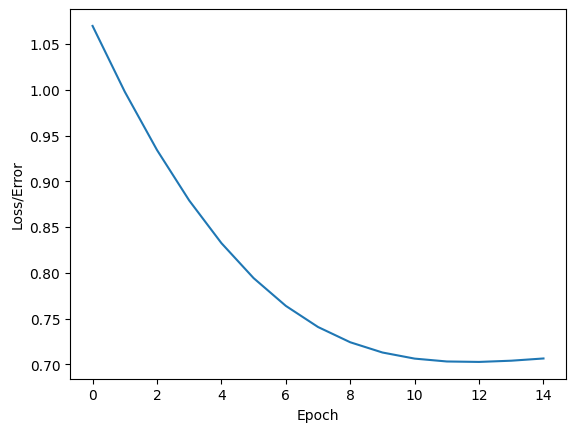

In [643]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [644]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, Y_test)
    

In [645]:
loss

tensor(0.7078)

In [646]:
correct = 0
trues=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
    
        print(f'{i+1}.) {str(y_val)} ')
        
        if y_val.argmax().item() == Y_test[i]:
            correct +=1

        if y_val.argmax().item()==1:
            trues+=1
    
print(f'We got {correct} correct!')
print(f'Trues:{trues}')
print(f'Accuracy is {correct/len(X_test)}')

1.) tensor([-25.9435, -25.9482]) 
2.) tensor([-33.5668, -33.6721]) 
3.) tensor([-18.1807, -18.0829]) 
4.) tensor([-37.1370, -37.2893]) 
5.) tensor([-58.6068, -59.0424]) 
6.) tensor([-25.1317, -25.1256]) 
7.) tensor([-21.2330, -21.1755]) 
8.) tensor([-31.7530, -31.8343]) 
9.) tensor([-25.3213, -25.3177]) 
10.) tensor([-34.6186, -34.7377]) 
11.) tensor([-29.0393, -29.0848]) 
12.) tensor([-30.8594, -30.9289]) 
13.) tensor([-25.3934, -25.3907]) 
14.) tensor([-27.3953, -27.4191]) 
15.) tensor([-31.6424, -31.7222]) 
16.) tensor([-30.8860, -30.9559]) 
17.) tensor([-34.4760, -34.5932]) 
18.) tensor([-41.6217, -41.8332]) 
19.) tensor([-28.0174, -28.0494]) 
20.) tensor([-29.6094, -29.6625]) 
21.) tensor([-24.8076, -24.7973]) 
22.) tensor([-38.3869, -38.5557]) 
23.) tensor([-22.9541, -22.9193]) 
24.) tensor([-34.5164, -34.6342]) 
25.) tensor([-35.0313, -35.1558]) 
26.) tensor([-30.1896, -30.2502]) 
27.) tensor([-20.4409, -20.3730]) 
28.) tensor([-28.7570, -28.7988]) 
29.) tensor([-26.0929, -26.09

In [647]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for X_test
predictions = []
with torch.no_grad():
    for data in X_test:
        output = model(data)
        predictions.append(output.argmax().item())

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print()

# Print True Positives, True Negatives, False Positives, False Negatives
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")


Confusion Matrix:
[[1870  765]
 [2285  280]]

True Positives: 280
True Negatives: 1870
False Positives: 765
False Negatives: 2285
